# **Тестовое задание на позицию BI-аналитик Каменный город**
______________________
_________________________



Выполненные задания присылайте на dm.ushakov@eduregion.ru или в Телеграм

## **0. Импорт библиотек**

In [ ]:
# Загрузим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import plotly.express as px
from plotly import graph_objects as go
#import warnings
#warnings.filterwarnings('ignore')

#pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# Объявим функцию первичного знакомства с датафреймом
def df_info(df):
    display(df.head(2))
    display(df.info())
    display(df.describe().round(2))

## **Задание 1: Дашборд для оценки эффективности Яндекс.Директ**
___________________________


_________________
_________________

Перед вами стоит задача построить дашборд с оценкой эффективности канала Яндекс.Директ. В папке task_1 вы найдете таблицы с данными.

- table_1: содержит в себе данные из рекламного кабинета
- table_2: содержит данные по кол-ву заявок
- table_3: содержит данные по кол-ву продаж и выручке

**Задание:**

- Составьте сводную таблицу со сквозной аналитикой. С примером можно ознакомиться здесь.
- На основе полученной таблицы сделайте вывод об эффективности канала.
- Спроектируйте макет дашборда, используя данные из таблиц.
Отлично, если в качестве решения вы предоставите публичную ссылку или скриншот созданного вами дашборда (со сводной таблицей и выводами) в любом BI-инструменте. Однако допускаются иные варианты выполнения.

_____________
____________



**Описание данных:**

**table_1.csv** — Данные из рекламного кабинета

| колонка | описание |
|---------|----------|
| date | дата |
| campaign | id рекламной кампании |
| keyword | ключевое слово |
| impressions | показы объявлений |
| clicks | клики по объявлениям |
| cost | расход, ₽ |

**table_2.csv** — Данные по кол-ву заявок

| колонка | описание |
|---------|----------|
| campaign | id рекламной кампании |
| keyword | ключевое слово, по которому была заявка |
| date | дата |
| leads | кол-во заявок |

**table_3.csv** — Данные по продажам и выручке

| колонка | описание |
|---------|----------|
| campaign | id рекламной кампании |
| keyword | ключевое слово, по которому была продажа |
| date | дата |
| sales | кол-во продаж |
| revenue | выручка, ₽ |

**Пример сводной таблицы со сквозной аналитикой**

| Дата | Ключевое слово | Расход | Показы | Клики | Заявки | Продажи | Выручка | ARPPU | CTR | CR0 | CR1 | CPC | CPL | CAC | ROMI |
|------|----------------|--------|--------|-------|--------|---------|---------|-------|-----|-----|-----|-----|-----|-----|------|
| 2023-10-11 | каменный город | 545 | 6477 | 68 | 12 | 2 | 6842 | 3421 | 0.01 | 0.17 | 0.16 | 8 | 45.4 | 272 | 11.5
| 2023-10-12 | eduregion | 125 | 4555 | 12 | 3 | 0 | 0 | 0 | 0.0026 | 0 | 0 | 10.4 | 0 | 0 | 0 |

**Описание метрик**

| Метрика | Описание |
|---------|----------|
| ARPPU | Средний доход на пользователя <br> `Выручка / Продажи` |
| CTR | Кликабельность <br> `Клики / Показы` |
| CR0 | Конверсия из кликов в заявки <br> `Заявки / Клики` |
| CR1 | Конверсия из заявок в продажи <br> `Продажи / Заявки` |
| CPC | Стоимость клика <br> `Расход / Клики` |
| CPL | Стоимость заявки <br> `Расход / Заявки` |
| CAC | Стоимость клиента <br> `Расход / Продажи` |
| ROMI | Возврат инвестиций из расходов на маркетинг <br> `(Выручка - Расход) / Расход` |

### **1.1. Чтение файлов, первичная обработка данных**

#### **1.1.1. table_1.csv**

In [ ]:
# Создадим датафрейм clicks_cost на основе файла table_1.csv и изучим его
clicks_cost = pd.read_csv('https://raw.githubusercontent.com/ushakov-dm/eduregion-analytics-trial-assignment/main/task_1/table_1.csv', sep = ';')
df_info(clicks_cost)

,date,campaign,keyword,impressions,clicks,cost
0,16.10.2023,61815333,lk eduregion ru,12,6,"120,48"
1,18.10.2023,61815333,lk eduregion ru,10,5,"250,35"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10943 entries, 0 to 10942
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         10943 non-null  object
 1   campaign     10943 non-null  int64 
 2   keyword      10943 non-null  object
 3   impressions  10943 non-null  int64 
 4   clicks       10943 non-null  int64 
 5   cost         10943 non-null  object
dtypes: int64(3), object(3)
memory usage: 513.1+ KB


None

,campaign,impressions,clicks
count,10943.00,10943.00,10943.00
mean,92360799.09,1.28,0.11
std,5974797.11,0.88,0.36
min,61815333.00,0.00,0.00
25%,91209716.00,1.00,0.00
50%,91209716.00,1.00,0.00
75%,97238484.00,1.00,0.00
max,97238484.00,18.00,6.00


**Промежуточный вывод:**

- в датафрейме 6 столбцов, 10943 строки;
- необходимо изменить тип данных в столбце date;
- необходимо изменить тип данных в столбце cost.

In [ ]:
# Изменим тип данных в столбце с датой
clicks_cost['date'] = pd.to_datetime(clicks_cost['date'], format='%d.%m.%Y', errors='coerce')

In [ ]:
# Выясним причину типа данных object в столбце cost
clicks_cost[~clicks_cost['cost'].str.isdigit()]

,date,campaign,keyword,impressions,clicks,cost
0,2023-10-16,61815333,lk eduregion ru,12,6,"120,48"
1,2023-10-18,61815333,lk eduregion ru,10,5,"250,35"
2,2023-10-19,61815333,lk eduregion ru,7,5,"254,75"
3,2023-10-04,91399039,курсы логопеда,7,4,"338,04"
4,2023-10-05,61815333,lk eduregion ru,5,4,"205,01"
...,...,...,...,...,...,...
1108,2023-10-31,91209716,логопедия лучший учебник,1,1,"30,37"
1109,2023-10-31,97238484,обучиться на логопеда,1,1,"109,08"
1110,2023-10-31,97238484,переподготовка логопед,1,1,"78,35"
1111,2023-10-31,88370062,профессиональная переподготовка на логопеда ди...,1,1,"70,47"


**Промежуточный вывод:**

 в столбце 'cost' необходимо изменить десятичный разделитель.

In [ ]:
# Изменим тип данных в столбце 'cost'
clicks_cost['cost'] = clicks_cost['cost'].str.replace(',', '.').astype(float)

In [ ]:
# Повторно выведем общую информацию о датафрейме (проверка)
clicks_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10943 entries, 0 to 10942
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         10943 non-null  datetime64[ns]
 1   campaign     10943 non-null  int64         
 2   keyword      10943 non-null  object        
 3   impressions  10943 non-null  int64         
 4   clicks       10943 non-null  int64         
 5   cost         10943 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 513.1+ KB


In [ ]:
# Проверим наличие полных дубликатов
len(clicks_cost[clicks_cost.duplicated()])

0

In [ ]:
# Посмотрим на уникальные id рекламных компаний
print(clicks_cost['campaign'].nunique())
clicks_cost['campaign'].unique()

6


array([61815333, 91399039, 88370062, 97238484, 91399044, 91209716])

In [ ]:
# Узнаем за какой период нам предоставлены данные
print(clicks_cost['date'].min())
print(clicks_cost['date'].max())

2023-10-01 00:00:00
2023-10-31 00:00:00


In [ ]:
# Создадим таблицу сгруппированную по датам и id рекламных компаний
clicks_cost_date = clicks_cost.groupby(['date', 'campaign'])[['impressions', 'clicks', 'cost']].sum().reset_index()
clicks_cost_date

,date,campaign,impressions,clicks,cost
0,2023-10-01,61815333,9,5,202.45
1,2023-10-01,88370062,102,12,1864.63
2,2023-10-01,91209716,268,18,774.41
3,2023-10-01,91399039,84,11,1219.65
4,2023-10-01,91399044,134,9,1190.74
...,...,...,...,...,...
110,2023-10-30,91209716,237,15,1741.16
111,2023-10-31,61815333,34,10,553.26
112,2023-10-31,88370062,47,1,70.47
113,2023-10-31,91209716,89,4,159.06


#### **1.1.2. table_2.csv**

In [ ]:
# Создадим датафрейм leads на основе файла table_2.csv и изучим его
leads = pd.read_csv('https://github.com/ushakov-dm/eduregion-analytics-trial-assignment/raw/main/task_1/table_2.csv')
df_info(leads)

,campaign,keyword,date,leads
0,61815333,eduregion ru,2023-10-11,1
1,61815333,eduregion ru,2023-10-16,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   campaign  156 non-null    object
 1   keyword   138 non-null    object
 2   date      156 non-null    object
 3   leads     156 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.0+ KB


None

,leads
count,156.00
mean,1.42
std,0.85
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,5.00


**Промежуточный вывод:**

- в датафрейме 4 столбца, 156 строк;
- необходимо изменить тип данных в столбце date;
- необходимо почему тип данных object в столбце campaign (в датафрейме clicks_cost тип данных id кампаний был целым числом).

In [ ]:
# Изменим тип данных в столбце с датой
leads['date'] = pd.to_datetime(leads['date'], format='%Y-%m-%d', errors='coerce')

In [ ]:
# Посмотрим на уникальные id рекламных компаний
leads['campaign'].unique()

array(['61815333', '88370062', '91209716', '91399039', '97238484',
       'Мастер / Пермь', 'Синергия / 2023 / Бренд / Поиск',
       'Синергия / 2023 / Поиск', 'Синергия 2022 / Бренд / Поиск',
       'Синергия 2022 / Поиск'], dtype=object)

**Промежуточный вывод:**

оставлю только цифровые id рекламных кампаний

In [ ]:
leads = leads[leads['campaign'].str.isdigit()]
leads['campaign'].unique()

array(['61815333', '88370062', '91209716', '91399039', '97238484'],
      dtype=object)

In [ ]:
leads['campaign'] = leads['campaign'].astype(int)

In [ ]:
# Повторно выведем общую информацию о датафрейме (проверка)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   campaign  150 non-null    int64         
 1   keyword   132 non-null    object        
 2   date      150 non-null    datetime64[ns]
 3   leads     150 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.9+ KB


In [ ]:
# Проверим наличие полных дубликатов
len(leads[leads.duplicated()])

0

In [ ]:
# Изучим информацию о количестве пропусков в столбцах
leads.isna().sum()

campaign     0
keyword     18
date         0
leads        0
dtype: int64

In [ ]:
# Посмотрим на строки с пропусками
leads[leads['keyword'].isna()]

,campaign,keyword,date,leads
89,91209716,NaN,2023-10-05,2
90,91209716,NaN,2023-10-06,2
91,91209716,NaN,2023-10-07,1
92,91209716,NaN,2023-10-08,1
93,91209716,NaN,2023-10-09,2
94,91209716,NaN,2023-10-10,3
95,91209716,NaN,2023-10-11,2
96,91209716,NaN,2023-10-12,4
97,91209716,NaN,2023-10-13,1
98,91209716,NaN,2023-10-17,1


In [ ]:
# Посмотрим на ключевые слова в рекламной компании с id 91209716
leads.loc[leads['campaign']=='91209716']['keyword'].unique()

array([], dtype=object)

**Промежуточный вывод:**

Оставлю пропуски, хотя мне не понятна природа их происхождения.

In [ ]:
# Узнаем за какой период нам предоставлены данные
print(leads['date'].min())
print(leads['date'].max())

2023-10-01 00:00:00
2023-10-31 00:00:00


In [ ]:
# Создадим таблицу сгруппированную по датам и id рекламных компаний
leads_date = leads.groupby(['date', 'campaign'])['leads'].sum().reset_index()
leads_date

,date,campaign,leads
0,2023-10-01,91209716,3
1,2023-10-01,97238484,2
2,2023-10-02,88370062,1
3,2023-10-02,91399039,3
4,2023-10-02,97238484,6
...,...,...,...
59,2023-10-28,91209716,8
60,2023-10-29,91209716,4
61,2023-10-30,91209716,13
62,2023-10-31,91209716,7


#### **1.1.3. table_3.csv**

In [ ]:
# Создадим датафрейм revenue на основе файла table_3.csv и изучим его
revenue = pd.read_csv('https://github.com/ushakov-dm/eduregion-analytics-trial-assignment/raw/main/task_1/table_3.csv')
df_info(revenue)

,campaign,keyword,date,sales,revenue
0,61815333,eduregion ru,2023-10-17,1,2880.00
1,88370062,где учиться на логопеда,2023-10-02,1,41156.71


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   campaign  17 non-null     int64  
 1   keyword   16 non-null     object 
 2   date      17 non-null     object 
 3   sales     17 non-null     int64  
 4   revenue   17 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 808.0+ bytes


None

,campaign,sales,revenue
count,17.00,17.0,17.00
mean,88812480.76,1.0,23739.73
std,7064832.65,0.0,15925.17
min,61815333.00,1.0,2880.00
25%,88370062.00,1.0,13650.00
50%,91209716.00,1.0,17017.00
75%,91209716.00,1.0,41958.69
max,91209716.00,1.0,47700.00


**Промежуточный вывод:**

- в датафрейме 5 столбцов, 17 строк;
- необходимо изменить тип данных в столбце date.

In [ ]:
# Изменим тип данных в столбце с датой
revenue['date'] = pd.to_datetime(revenue['date'], format='%Y-%m-%d', errors='coerce')

In [ ]:
# Повторно выведем общую информацию о датафрейме (проверка)
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   campaign  17 non-null     int64         
 1   keyword   16 non-null     object        
 2   date      17 non-null     datetime64[ns]
 3   sales     17 non-null     int64         
 4   revenue   17 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 808.0+ bytes


In [ ]:
revenue.isna().sum()

campaign    0
keyword     1
date        0
sales       0
revenue     0
dtype: int64

In [ ]:
revenue[revenue['keyword'].isna()]

,campaign,keyword,date,sales,revenue
16,91209716,NaN,2023-10-27,1,3735.0


**Промежуточный вывод:**

Оставим пропуск.

In [ ]:
# Проверим наличие полных дубликатов
len(revenue[revenue.duplicated()])

0

In [ ]:
# Посмотрим на уникальные id рекламных компаний
revenue['campaign'].unique()

array([61815333, 88370062, 91209716])

In [ ]:
# Посмотрим на уникальные keyword рекламных компаний
revenue['keyword'].unique()

array(['eduregion ru', 'где учиться на логопеда',
       'каменный город логопед', 'логопед заочное обучение',
       '---autotargeting', 'логопед обучение дистанционно',
       'логопедия обучение', 'переподготовка на логопеда дистанционно',
       'учитель логопед переподготовка', nan], dtype=object)

In [ ]:
# Узнаем за какой период нам предоставлены данные
print(revenue['date'].min())
print(revenue['date'].max())

2023-10-02 00:00:00
2023-10-31 00:00:00


In [ ]:
# Создадим таблицу сгруппированную по датам и id рекламных компаний
revenue_date = revenue.groupby(['date', 'campaign'])[['sales', 'revenue']].sum().reset_index()
revenue_date

,date,campaign,sales,revenue
0,2023-10-02,88370062,1,41156.71
1,2023-10-03,91209716,1,43100.00
2,2023-10-04,91209716,1,17017.00
3,2023-10-06,91209716,1,17915.78
4,2023-10-09,91209716,1,41958.69
5,2023-10-11,91209716,2,55600.00
6,2023-10-16,88370062,1,18200.00
7,2023-10-17,61815333,1,2880.00
8,2023-10-17,91209716,1,42038.01
9,2023-10-18,91209716,1,16380.00


### **1.2. Создание сводной таблицы со сквозной аналитикой**

In [ ]:
# Объединим датафреймы clicks_cost_date, leads_date, revenue_date по столбцам 'date' и 'campaign'
# Создадим дополнительные столбцы 'week' и 'month'
df = clicks_cost_date.merge(leads_date, on=['date', 'campaign'], how='left').merge(revenue_date, on=['date','campaign'], how='left').fillna(0)
df['week'] = df['date'].dt.isocalendar().week
df['month'] = df['date'].dt.month
df.head(2)

,date,campaign,impressions,clicks,cost,leads,sales,revenue,week,month
0,2023-10-01,61815333,9,5,202.45,0.0,0.0,0.0,39,10
1,2023-10-01,88370062,102,12,1864.63,0.0,0.0,0.0,39,10


In [ ]:
# Объявим функцию создания сводной таблицу со сквозной аналитикой по заданному периоду
def create_pivot_table(df, period):
    df = (
        df.groupby([period, 'campaign'])
        [['impressions', 'clicks', 'cost', 'leads', 'sales','revenue']]
        .sum()
        .reset_index()
    )
    df['leads'] = df['leads'].astype(int)
    df['sales'] = df['sales'].astype(int)
    df['ARPPU'] = round(df['revenue']/df['sales'], 2)
    df['CTR'] = round(df['clicks']/df['impressions'], 2)
    df['CR0'] = round(df['leads']/df['clicks'], 2)
    df['CR1'] = round(df['sales']/df['leads'], 2)
    df['CPC'] = round(df['cost']/df['clicks'], 2)
    df['CPL'] = np.where(df['sales']==0, 0, df['cost']/df['leads']).round(2)
    df['CAC'] = np.where(df['sales']==0, 0, df['cost']/df['sales']).round(2)
    df['ROMI'] = np.where(df['sales']==0, 0, (df['revenue']-df['cost'])/df['cost']).round(2)
    df = df.fillna(0)
    return df

In [ ]:
# Создадим сводную таблицу со сквозной аналитикой за месяц
funnel_monthly = create_pivot_table(df, 'month')
funnel_monthly

,month,campaign,impressions,clicks,cost,leads,sales,revenue,ARPPU,CTR,CR0,CR1,CPC,CPL,CAC,ROMI
0,10,61815333,519,203,13044.24,3,1,2880.00,2880.00,0.39,0.01,0.33,64.26,4348.08,13044.24,-0.78
1,10,88370062,2096,239,35080.00,14,3,70846.37,23615.46,0.11,0.06,0.21,146.78,2505.71,11693.33,1.02
2,10,91209716,5080,327,28746.33,139,12,311648.96,25970.75,0.06,0.43,0.09,87.91,206.81,2395.53,9.84
3,10,91399039,739,114,13660.34,9,0,0.00,0.00,0.15,0.08,0.00,119.83,0.00,0.00,0.00
4,10,91399044,606,30,3794.29,0,0,0.00,0.00,0.05,0.00,0.00,126.48,0.00,0.00,0.00
5,10,97238484,4941,313,30004.65,49,0,0.00,0.00,0.06,0.16,0.00,95.86,0.00,0.00,0.00


In [ ]:
# Создадим сводную таблицу со сквозной аналитикой за неделю
funnel_weekly = create_pivot_table(df, 'week')
funnel_weekly.head(6)

,week,campaign,impressions,clicks,cost,leads,sales,revenue,ARPPU,CTR,CR0,CR1,CPC,CPL,CAC,ROMI
0,39,61815333,9,5,202.45,0,0,0.0,0.0,0.56,0.00,0.0,40.49,0.0,0.0,0.0
1,39,88370062,102,12,1864.63,0,0,0.0,0.0,0.12,0.00,0.0,155.39,0.0,0.0,0.0
2,39,91209716,268,18,774.41,3,0,0.0,0.0,0.07,0.17,0.0,43.02,0.0,0.0,0.0
3,39,91399039,84,11,1219.65,0,0,0.0,0.0,0.13,0.00,0.0,110.88,0.0,0.0,0.0
4,39,91399044,134,9,1190.74,0,0,0.0,0.0,0.07,0.00,0.0,132.30,0.0,0.0,0.0
5,39,97238484,52,3,354.30,2,0,0.0,0.0,0.06,0.67,0.0,118.10,0.0,0.0,0.0


In [ ]:
# Создадим сводную таблицу со сквозной аналитикой за день
funnel_daily = create_pivot_table(df, 'date')
funnel_daily.head(6)

,date,campaign,impressions,clicks,cost,leads,sales,revenue,ARPPU,CTR,CR0,CR1,CPC,CPL,CAC,ROMI
0,2023-10-01,61815333,9,5,202.45,0,0,0.0,0.0,0.56,0.00,0.0,40.49,0.0,0.0,0.0
1,2023-10-01,88370062,102,12,1864.63,0,0,0.0,0.0,0.12,0.00,0.0,155.39,0.0,0.0,0.0
2,2023-10-01,91209716,268,18,774.41,3,0,0.0,0.0,0.07,0.17,0.0,43.02,0.0,0.0,0.0
3,2023-10-01,91399039,84,11,1219.65,0,0,0.0,0.0,0.13,0.00,0.0,110.88,0.0,0.0,0.0
4,2023-10-01,91399044,134,9,1190.74,0,0,0.0,0.0,0.07,0.00,0.0,132.30,0.0,0.0,0.0
5,2023-10-01,97238484,52,3,354.30,2,0,0.0,0.0,0.06,0.67,0.0,118.10,0.0,0.0,0.0


### **1.3. Построение маркетинговых воронок по результатам рекламных кампаний за месяц**

In [ ]:
# объявим функцию построения воронки рекламной компании
'''
def show_funnel_1(df, n):
    df = df[df['campaign']==n][['impressions', 'clicks', 'leads', 'sales']]
    data = dict(
    number = list(df.iloc[0]),
    stage = list(df.columns))
    fig = px.funnel(data, x='number', y='stage', title= f'Воронка рекламной компании {n}')
    fig.show()
'''

"\ndef show_funnel_1(df, n):\n    df = df[df['campaign']==n][['impressions', 'clicks', 'leads', 'sales']]\n    data = dict(\n    number = list(df.iloc[0]),\n    stage = list(df.columns))\n    fig = px.funnel(data, x='number', y='stage', title= f'Воронка рекламной компании {n}')\n    fig.show()\n"

In [ ]:
'''
for i in list(funnel_monthly['campaign']):
    show_funnel_1(funnel_monthly, i)
'''

"\nfor i in list(funnel_monthly['campaign']):\n    show_funnel_1(funnel_monthly, i)\n"

In [ ]:
def show_funnel_2(df, n):
    df = df[df['campaign']==n][['impressions', 'clicks', 'leads', 'sales']]
    fig = go.Figure(go.Funnel(
    y = list(df.columns),
    x = list(df.iloc[0]),
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "red", "red"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )
    fig.update_layout(title_text=f'Воронка рекламной компании {n}')
    fig.show()

In [ ]:
for i in list(funnel_monthly['campaign']):
    show_funnel_2(funnel_monthly, i)

### **1.4. Выводы об эффективности рекламных кампании**

--------------------------
--------------------------
В анализируемом периоде - октябре 2023 г.:

1. Из 6 рекламных кампаний к продажам привели 3: 61815333, 88370062, 91209716.
2. Положительный ROMI имеют 2 кампании: 88370062, 91209716.
3. Самой эффективной является кампания 91209716: максимальный ARPPU, минимальный САС.
4. Самая неэффективная кампания 97238484: необходимо узнать причину нулевой конверсии на шаге зявка-продажа.
5. Компании 91399039 и 91399044 не привели к продажам, но в отличие от других кампаний они длились меньше месяца.

Конверсия в продажи к первому шагу считается нормальной в диапозоне 2-5%%. Показатель самой эффективной из рассмотренных кампаний - 0.2%. Следовательно, в отсутствии дополнительной информации, рекламные кампании нельзя считать эффективными.

- ID 61815333 - низкий С0 (0.01);
- ID 88370062 - низкий С0 (0.06);
- ID 91209716 - низкий CTR (0.06) и низкий С1 (0.09);
- ID 91399039	 - низкий CTR (0.15) и низкий С1 (0.08);
- ID 91399044	 - низкий CTR (0.05);
- ID 97238484		 - низкий CTR (0.06).


### **1.5. Проект дашборда**

In [ ]:
# Создадим датафрейм для дашборда
df.sort_values(by='date')
df['total_cost'] = df['cost'].cumsum()
df['total_revenue'] = df['revenue'].cumsum()
df.head(10)

,date,campaign,impressions,clicks,cost,leads,sales,revenue,week,month,total_cost,total_revenue
0,2023-10-01,61815333,9,5,202.45,0.0,0.0,0.00,39,10,202.45,0.00
1,2023-10-01,88370062,102,12,1864.63,0.0,0.0,0.00,39,10,2067.08,0.00
2,2023-10-01,91209716,268,18,774.41,3.0,0.0,0.00,39,10,2841.49,0.00
3,2023-10-01,91399039,84,11,1219.65,0.0,0.0,0.00,39,10,4061.14,0.00
4,2023-10-01,91399044,134,9,1190.74,0.0,0.0,0.00,39,10,5251.88,0.00
5,2023-10-01,97238484,52,3,354.30,2.0,0.0,0.00,39,10,5606.18,0.00
6,2023-10-02,61815333,22,5,223.63,0.0,0.0,0.00,40,10,5829.81,0.00
7,2023-10-02,88370062,80,10,1509.34,1.0,1.0,41156.71,40,10,7339.15,41156.71
8,2023-10-02,91209716,247,17,1443.56,0.0,0.0,0.00,40,10,8782.71,41156.71
9,2023-10-02,91399039,80,14,2090.20,3.0,0.0,0.00,40,10,10872.91,41156.71


In [ ]:
# Выгрузим csv файл для построения дашборда
df.to_csv('/content/drive/MyDrive/DATA/stone_city.csv', index = False)

Ссылка на дашборд в Datalens

https://datalens.yandex/0nyla03s2pxup?_theme=dark

## **2. Описание модели данных для нового источника**



В своей работе мы постоянно используем сервис-коннектор к различным источникам данных — myBi. Перед вами стоит задача описать новую таблицу в БД, в которую будут стримиться данные о регистрации на вебинары.

**Задание:**

- Ознакомьтесь с документацией по описанию таблиц данных в myBi и с примером уже описанных таблиц
- Ознакомьтесь с примером получаемых после регистрации данных.
- Разработайте и опишите модель данных с использованием правил myBi для json файла из папки task_2

Отлично, если в качестве результата вы предоставите публичную ссылку или изображение с визуализацией модели данных и json-файл с правилами для таблиц.


Описание примера json
example.json — пример получаемых данных о регистрации на вебинар

| ключ | описание |
|---------|----------|
| w_date | Дата проведения вебинара |
| w_name | Название вебинара |
| email | Email пользователя |
| phone | Телефон пользователя |
| sb_id | ID в мессенеджере |
| name | Имя пользователя |
| full_date | Дата отправки json |
| utm_source | Значение utm source |
| utm_medium | Значение utm medium |
| utm_campaign | Значение utm campaign |

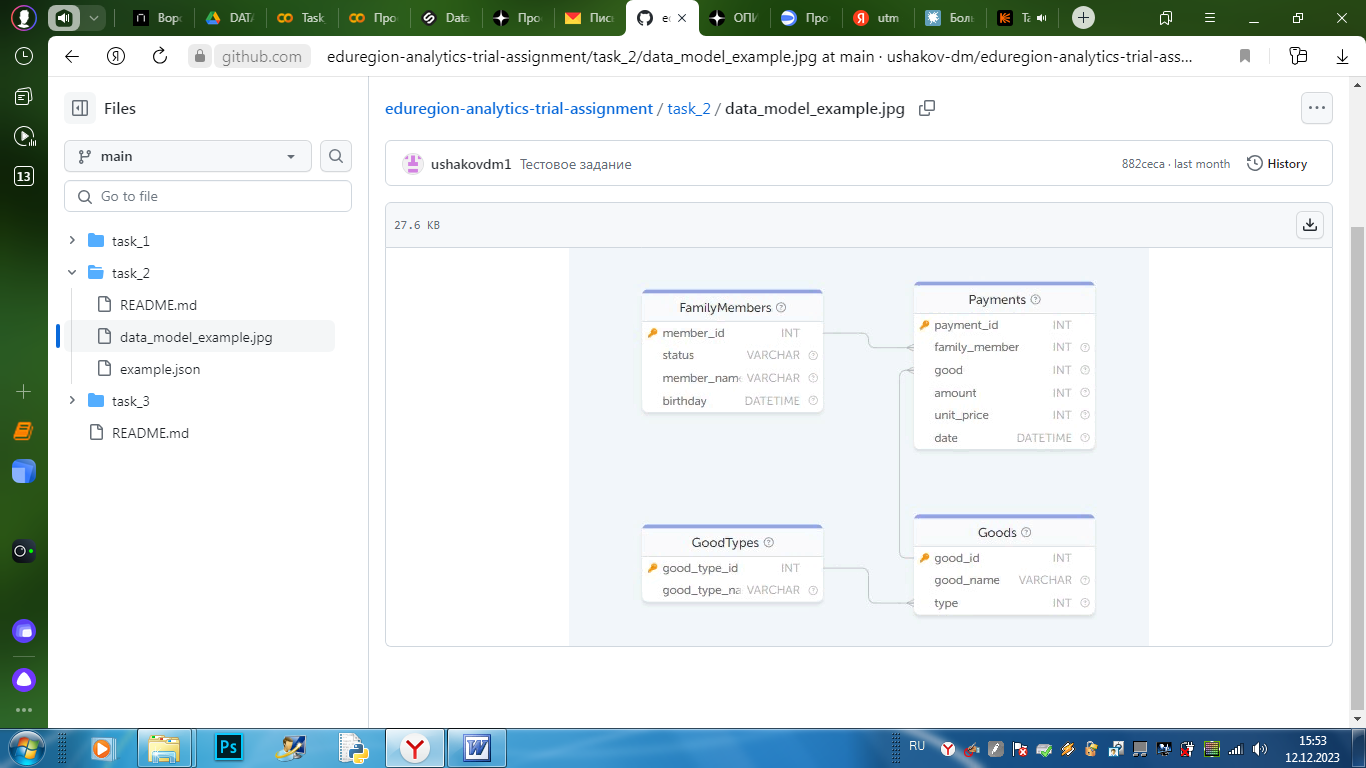

{
    "w_date": "2023-10-23",
    "w_name": "Автовебинар Секреты профессионального логопеда",
    "email": "test@mail.ru",
    "phone": "79821234567",
    "sb_id": "5656561",
    "name": "Иван Иванов",
    "full_date": "2023-10-13 14:00",
    "utm_source": "test",
    "utm_medium": "test",
    "utm_campaign": "test"
}

### **2.1. ER диаграмма**

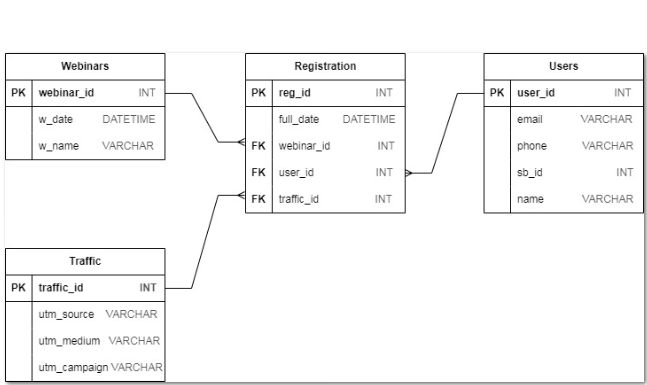

## **3. Зависимость между поисковыми запросами**

В Вордстат мы собрали статистику по поисковым запросам: "каменный город курсы" (далее — кластер 1) и "каменный город отзывы" (далее — кластер 2). Необходимо проверить гипотезу: чем выше аффинити-индекс для запросов, связанных с обучением, тем ниже этот же индекс для кластера с отзывами. Отсюда возникает предположение: чем меньше мы известны в регионе, тем чаще пользователи ищут информацию об отзывах.

**Задание:**

- Ознакомьтесь с наборами данных в папке task_3 - Проведите исследование зависимости аффинити-индексов для двух кластеров. Отдельно по городам, отдельно по регионам.
- Сделайте выводы.
- ⭐Задание со звёздочкой: Текущие поисковые запросы не отражают полной картины кластера. Например, в кластер 1, можно добавить "каменный город обучение", "каменный город переподготовка" итд. Попробуйте расширить семантику запроса, используя операторы и провести исследование из п.2

Отлично, если в качестве результата вы предоставите файлы/ноутбуки с python кодом, воспользуетесь различными библиотеками и прокомментируете код. Однако допускаются иные варианты выполнения.

Вордстат — это инструмент, который показывает статистику поисковых запросов к Яндексу. С его помощью можно посмотреть, как менялась популярность интересующих вас запросов и как она отличается в разных регионах России, а также построить топы запросов с нужными словами и узнать, что еще люди искали на ту же тему.

Описание таблиц и содержащихся в них данных

Описание таблиц

| Таблица | Описание |
|---------|----------|
| region_stat_1 | статистика запросов по регионам для `кластера 1` |
| city_stat_1 | статистика запросов по городам для `кластера 1` |
| region_stat_2 | статистика запросов по регионам для `кластера 2` |
| city_stat_2 | статистика запросов по городам для `кластера 2` |

Описание колонок

| Колонка | Описание |
|---------|----------|
| Число запросов | Общее количество запросов, содержащих заданную фразу, по указанному региону |
| Доля от всех запросов, % | Доля числа запросов, содержащих заданную фразу, от общего числа запросов к Яндексу в указанном регионе |
| Индекс интереса, % <br> (индекс соответствия, аффинити-индекс) | Отношение отобранных запросов в регионе к их доле по стране. 100% указывает, что регион не выделяется по уровню интереса к теме запроса; более 100%, что интерес повышен |

### **3.1. Анализ запросов по городам**

In [ ]:
# Создадим датафрейм city_stat_1 на основе файла city_stat_1.csv и изучим его
city_stat_1 = pd.read_csv('https://github.com/ushakov-dm/eduregion-analytics-trial-assignment/raw/main/task_3/city_stat_1.csv', sep = ';')
city_stat_1.head(2)

,Регион,Число запросов,"Доля от всех запросов, %","Индекс интереса (аффинити-индекс), %","Частотность запросов «каменный город курсы» по регионам, 13.10.2023 — 13.11.2023, все устройства"
0,Санкт-Петербург,23,"0,0000039","16,999",NaN
1,Иваново,7,"0,0000194","83,352",NaN


In [ ]:
# Изучим общую информацию по датафрейму
city_stat_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Регион                                                                                            184 non-null    object 
 1   Число запросов                                                                                    184 non-null    int64  
 2   Доля от всех запросов, %                                                                          184 non-null    object 
 3   Индекс интереса (аффинити-индекс), %                                                              184 non-null    object 
 4   Частотность запросов «каменный город курсы» по регионам, 13.10.2023 — 13.11.2023, все устройства  0 non-null      float64
dtypes:

In [ ]:
# Создадим датафрейм city_stat_2 на основе файла city_stat_2.csv и изучим его
city_stat_2 = pd.read_csv('https://github.com/ushakov-dm/eduregion-analytics-trial-assignment/raw/main/task_3/city_stat_2.csv', sep = ';')
city_stat_2.head(2)

,Регион,Число запросов,"Доля от всех запросов, %","Индекс интереса (аффинити-индекс), %","Частотность запросов «каменный город отзывы» по регионам, 13.10.2023 — 13.11.2023, все устройства"
0,Санкт-Петербург,12,"0,00000207","90,14",NaN
1,Кострома,1,"0,00000388","169,09",NaN


In [ ]:
# Изучим общую информацию по датафрейму
city_stat_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Регион                                                                                             54 non-null     object 
 1   Число запросов                                                                                     54 non-null     int64  
 2   Доля от всех запросов, %                                                                           54 non-null     object 
 3   Индекс интереса (аффинити-индекс), %                                                               54 non-null     object 
 4   Частотность запросов «каменный город отзывы» по регионам, 13.10.2023 — 13.11.2023, все устройства  0 non-null      float64
dt

_____________________________
_____________________________

**Промежуточный вывод:**

Названия столбцов в датафреймах city_stat_1 и city_stat_2 совпадают, а количество строк нет.

Проверим какие города присутствуют в обоих датафреймах.

In [ ]:
# Проверим совпадения по столбцу 'Регион'
len(set(list(city_stat_1['Регион'])).intersection(set(list(city_stat_2['Регион']))))

42

In [ ]:
# Объединим двадатафрейма
city_stat = city_stat_1.merge(city_stat_2, on = 'Регион', how = 'inner', suffixes=('', '_отзывы'))

In [ ]:
# Посмотрим на получившийся датафрейм
city_stat.sample(5)

,Регион,Число запросов,"Доля от всех запросов, %","Индекс интереса (аффинити-индекс), %","Частотность запросов «каменный город курсы» по регионам, 13.10.2023 — 13.11.2023, все устройства",Число запросов_отзывы,"Доля от всех запросов, %_отзывы","Индекс интереса (аффинити-индекс), %_отзывы","Частотность запросов «каменный город отзывы» по регионам, 13.10.2023 — 13.11.2023, все устройства"
18,Барнаул,1,"0,0000016","7,234",NaN,1,"0,00000169","73,52",NaN
1,Кострома,2,"0,0000077","33,275",NaN,1,"0,00000388","169,09",NaN
21,Пущино,1,"0,0000706","302,096",NaN,2,"0,00014120","6 140,74",NaN
22,Магнитогорск,21,"0,0000792","339,006",NaN,2,"0,00000754","328,14",NaN
39,Минусинск,1,"0,0000216","92,787",NaN,1,"0,00002168","943,05",NaN


In [ ]:
# Изучим общую информацию по датафрейму
city_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 9 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Регион                                                                                             42 non-null     object 
 1   Число запросов                                                                                     42 non-null     int64  
 2   Доля от всех запросов, %                                                                           42 non-null     object 
 3   Индекс интереса (аффинити-индекс), %                                                               42 non-null     object 
 4   Частотность запросов «каменный город курсы» по регионам, 13.10.2023 — 13.11.2023, все устройства   0 non-null      float64
 5

_______________________
_____________________
**Промежуточный вывод:**

Для дальнейшего анализа нам нужных 3 столбца 'Регион', 'Индекс интереса (аффинити-индекс), %' и 'Индекс интереса (аффинити-индекс), %_отзывы'. Оставим их, остальные удилим.

Тип данных в столбцах 'Индекс интереса (аффинити-индекс), %' и 'Индекс интереса (аффинити-индекс), %_отзывы' object, нужен float. Изменим тип данных.

In [ ]:
# подготовим датафрейм city_stat к дальнейшему анализу
city_stat = city_stat[['Регион', 'Индекс интереса (аффинити-индекс), %', 'Индекс интереса (аффинити-индекс), %_отзывы']].copy()
city_stat.columns = ['Регион', 'Индекс_интереса_курсы', 'Индекс_интереса_отзывы']
city_stat['Индекс_интереса_курсы'] = city_stat['Индекс_интереса_курсы'].str.replace(',', '.').str.replace(' ', '').astype(float)
city_stat['Индекс_интереса_отзывы'] = city_stat['Индекс_интереса_отзывы'].str.replace(',', '.').str.replace(' ', '').astype(float)
city_stat.head(2)

,Регион,Индекс_интереса_курсы,Индекс_интереса_отзывы
0,Санкт-Петербург,16.999,90.14
1,Кострома,33.275,169.09


In [ ]:
# Изучим общую информацию по датафрейму
city_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Регион                  42 non-null     object 
 1   Индекс_интереса_курсы   42 non-null     float64
 2   Индекс_интереса_отзывы  42 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


In [ ]:
# Изучим общую информацию по датафрейму
city_stat.describe()

,Индекс_интереса_курсы,Индекс_интереса_отзывы
count,42.000000,42.000000
mean,236.349119,806.371429
std,316.675386,1259.388143
min,5.044000,37.980000
25%,36.112250,170.230000
50%,90.562000,317.445000
75%,335.881250,931.380000
max,1374.846000,6140.740000


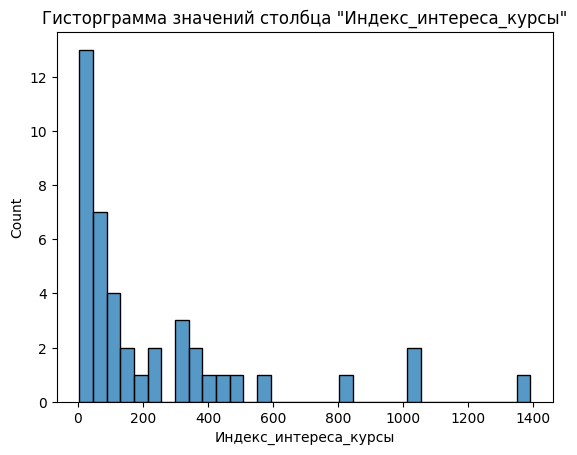

In [ ]:
# Изучим столбец "Индекс_интереса_курсы"
plt.title('Гисторграмма значений столбца "Индекс_интереса_курсы"')
sns.histplot(data=city_stat, x="Индекс_интереса_курсы", binwidth=42)
plt.show()

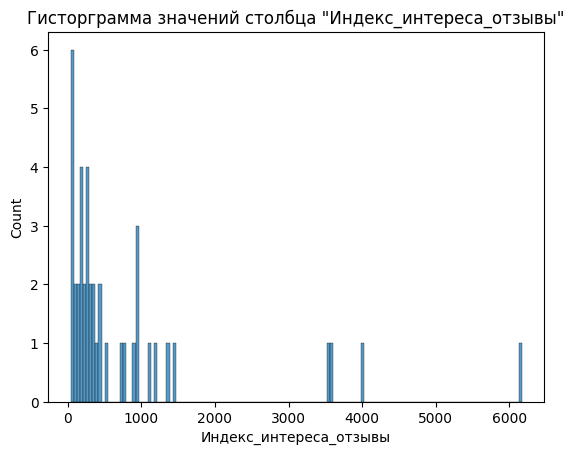

In [ ]:
# Изучим столбец "Индекс_интереса_отзывы"
plt.title('Гисторграмма значений столбца "Индекс_интереса_отзывы"')
sns.histplot(data=city_stat, x="Индекс_интереса_отзывы", binwidth=42)
plt.show()

______________________
______________________
**Промежуточный вывод:**

Странный индекс - индекс интереса. Значение более 6000% можно получить, еслу уд.вес целевой аудитории на сайте 60%, а в городу - 0.01%

In [ ]:
# Рассчитаем корреляцию по датафрейму
city_stat.corr()

<ipython-input-37-6021a8d5d978>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  city_stat.corr()


,Индекс_интереса_курсы,Индекс_интереса_отзывы
Индекс_интереса_курсы,1.000000,0.358155
Индекс_интереса_отзывы,0.358155,1.000000


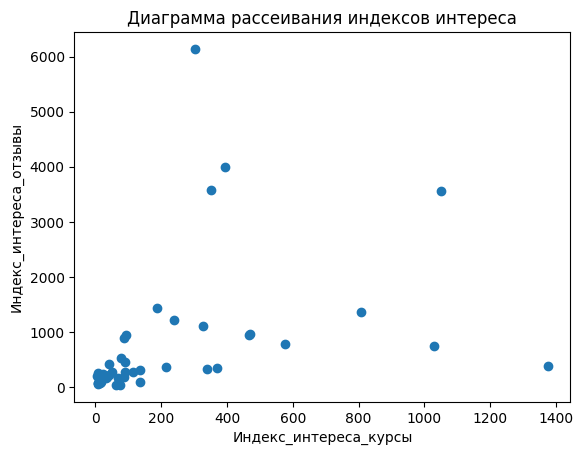

In [ ]:
# Построим scatterplot
plt.title('Диаграмма рассеивания индексов интереса')
plt.scatter(city_stat.Индекс_интереса_курсы, city_stat.Индекс_интереса_отзывы)
plt.xlabel('Индекс_интереса_курсы')
plt.ylabel('Индекс_интереса_отзывы')
plt.show;

___________________________
________________________
**Вывод:**

Корреляция между Индексом_интереса_курсов и Индексом_интереса_отзывов (города) положительная - 0.36, следовательно, гипотеза  

***чем выше аффинити-индекс для запросов, связанных с обучением, тем ниже этот же индекс для кластера с отзывами***

не подтвердилась.

### **3.2. Анализ запросов по регионам**

In [ ]:
# Создадим датафрейм city_stat_1 на основе файла city_stat_1.csv и изучим его
region_stat_1 = pd.read_csv('https://github.com/ushakov-dm/eduregion-analytics-trial-assignment/raw/main/task_3/region_stat_1.csv', sep = ';')
region_stat_1.head(2)

,Регион,Число запросов,"Доля от всех запросов, %","Индекс интереса (аффинити-индекс), %","Частотность запросов «каменный город курсы» по регионам, 13.10.2023 — 13.11.2023, все устройства"
0,Москва и область,84,"0,00000354","15,151",NaN
1,Центр,274,"0,00000728","31,187",NaN


In [ ]:
# Изучим общую информацию по датафрейму
region_stat_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   Регион                                                                                            118 non-null    object 
 1   Число запросов                                                                                    118 non-null    object 
 2   Доля от всех запросов, %                                                                          118 non-null    object 
 3   Индекс интереса (аффинити-индекс), %                                                              118 non-null    object 
 4   Частотность запросов «каменный город курсы» по регионам, 13.10.2023 — 13.11.2023, все устройства  0 non-null      float64
dtypes:

In [ ]:
# Создадим датафрейм city_stat_1 на основе файла city_stat_2.csv и изучим его
region_stat_2 = pd.read_csv('https://github.com/ushakov-dm/eduregion-analytics-trial-assignment/raw/main/task_3/region_stat_2.csv', sep = ';')
region_stat_2.head(2)

,Регион,Число запросов,"Доля от всех запросов, %","Индекс интереса (аффинити-индекс), %","Частотность запросов «каменный город отзывы» по регионам, 13.10.2023 — 13.11.2023, все устройства"
0,Москва и область,71,"0,00000299","130,15",NaN
1,Центр,91,"0,00000242","105,27",NaN


In [ ]:
# Изучим общую информацию по датафрейму
region_stat_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Регион                                                                                             66 non-null     object 
 1   Число запросов                                                                                     66 non-null     int64  
 2   Доля от всех запросов, %                                                                           66 non-null     object 
 3   Индекс интереса (аффинити-индекс), %                                                               66 non-null     object 
 4   Частотность запросов «каменный город отзывы» по регионам, 13.10.2023 — 13.11.2023, все устройства  0 non-null      float64
dt

**Промежуточный вывод:**

Названия столбцов в датафреймах region_stat_1 и region_stat_2 совпадают, а количество строк нет.

Проверим какие регионы присутствуют в обоих датафреймах.

In [ ]:
# Проверим совпадения по столбцу 'Регион'
len(set(list(region_stat_1['Регион'])).intersection(set(list(region_stat_2['Регион']))))

59

In [ ]:
# Объединим двадатафрейма
region_stat = region_stat_1.merge(region_stat_2, on = 'Регион', how = 'inner', suffixes=('', '_отзывы'))

In [ ]:
# Посмотрим на получившийся датафрейм
region_stat.sample(5)

,Регион,Число запросов,"Доля от всех запросов, %","Индекс интереса (аффинити-индекс), %","Частотность запросов «каменный город курсы» по регионам, 13.10.2023 — 13.11.2023, все устройства",Число запросов_отзывы,"Доля от всех запросов, %_отзывы","Индекс интереса (аффинити-индекс), %_отзывы","Частотность запросов «каменный город отзывы» по регионам, 13.10.2023 — 13.11.2023, все устройства"
53,Пушкинский район,1,"0,00000921","39,414",NaN,3,"0,00000933","406,13",NaN
2,Северо-Запад,230,"0,00001988","85,084",NaN,31,"0,00000268","116,55",NaN
25,Краснодарский край,26,"0,00000676","28,966",NaN,3,"0,00000078","33,96",NaN
29,Республика Марий Эл,6,"0,00001704","72,928",NaN,1,"0,00000284","123,53",NaN
39,Свердловская область,525,"0,00014695","628,817",NaN,20,"0,00000559","243,46",NaN


In [ ]:
# Изучим общую информацию по датафрейму
region_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 9 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Регион                                                                                             60 non-null     object 
 1   Число запросов                                                                                     60 non-null     object 
 2   Доля от всех запросов, %                                                                           60 non-null     object 
 3   Индекс интереса (аффинити-индекс), %                                                               60 non-null     object 
 4   Частотность запросов «каменный город курсы» по регионам, 13.10.2023 — 13.11.2023, все устройства   0 non-null      float64
 5

_______________________
_____________________
**Промежуточный вывод:**

Для дальнейшего анализа нам нужных 3 столбца 'Регион', 'Индекс интереса (аффинити-индекс), %' и 'Индекс интереса (аффинити-индекс), %_отзывы'. Оставим их, остальные удилим.

Тип данных в столбцах 'Индекс интереса (аффинити-индекс), %' и 'Индекс интереса (аффинити-индекс), %_отзывы' object, нужен float. Изменим тип данных.

In [ ]:
# подготовим датафрейм city_stat к дальнейшему анализу
region_stat = region_stat[['Регион', 'Индекс интереса (аффинити-индекс), %', 'Индекс интереса (аффинити-индекс), %_отзывы']].copy()
region_stat.columns = ['Регион', 'Индекс_интереса_курсы', 'Индекс_интереса_отзывы']
region_stat['Индекс_интереса_курсы'] = region_stat['Индекс_интереса_курсы'].str.replace(',', '.').str.replace(' ', '').astype(float)
region_stat['Индекс_интереса_отзывы'] = region_stat['Индекс_интереса_отзывы'].str.replace(',', '.').str.replace(' ', '').astype(float)
region_stat.head(2)

,Регион,Индекс_интереса_курсы,Индекс_интереса_отзывы
0,Москва и область,15.151,130.15
1,Центр,31.187,105.27


In [ ]:
# Изучим общую информацию по датафрейму
region_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Регион                  60 non-null     object 
 1   Индекс_интереса_курсы   60 non-null     float64
 2   Индекс_интереса_отзывы  60 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.9+ KB


In [ ]:
# Изучим общую информацию по датафрейму
region_stat.describe()

,Индекс_интереса_курсы,Индекс_интереса_отзывы
count,60.000000,60.000000
mean,170.595300,265.632833
std,205.452434,555.935838
min,3.848000,27.450000
25%,25.131500,63.735000
50%,113.471500,110.840000
75%,208.989500,216.270000
max,998.472000,3431.130000


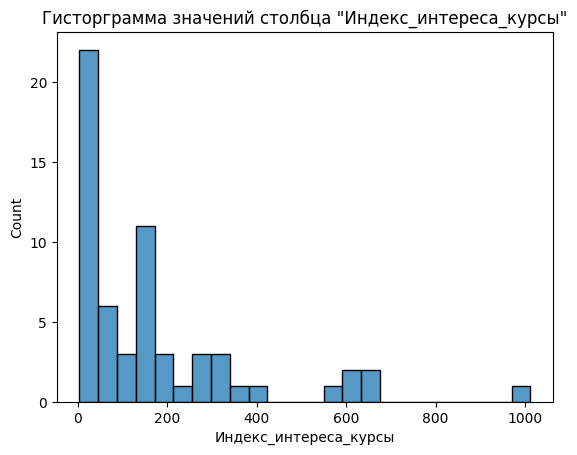

In [ ]:
# Изучим столбец "Индекс_интереса_курсы"
plt.title('Гисторграмма значений столбца "Индекс_интереса_курсы"')
sns.histplot(data=region_stat, x="Индекс_интереса_курсы", binwidth=42)
plt.show()

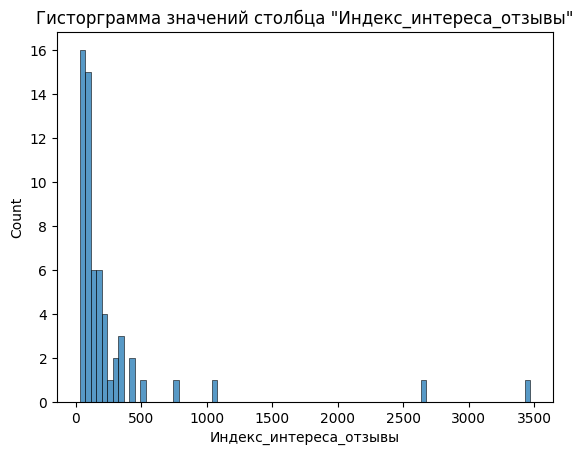

In [ ]:
# Изучим столбец "Индекс_интереса_отзывы"
plt.title('Гисторграмма значений столбца "Индекс_интереса_отзывы"')
sns.histplot(data=region_stat, x="Индекс_интереса_отзывы", binwidth=42)
plt.show()

In [ ]:
# Рассчитаем корреляцию по датафрейму
region_stat.corr()

<ipython-input-38-fbb5349bee00>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  region_stat.corr()


,Индекс_интереса_курсы,Индекс_интереса_отзывы
Индекс_интереса_курсы,1.00000,0.30878
Индекс_интереса_отзывы,0.30878,1.00000


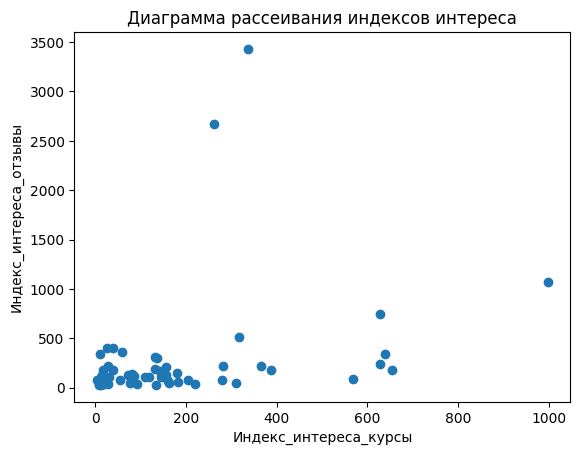

In [ ]:
# Построим scatterplot
plt.title('Диаграмма рассеивания индексов интереса')
plt.scatter(region_stat.Индекс_интереса_курсы, region_stat.Индекс_интереса_отзывы)
plt.xlabel('Индекс_интереса_курсы')
plt.ylabel('Индекс_интереса_отзывы')
plt.show;

___________________________
________________________
**Вывод:**

Корреляция между Индексом_интереса_курсов и Индексом_интереса_отзывов (регионы) положительная - 0.31, следовательно, гипотеза  

***чем выше аффинити-индекс для запросов, связанных с обучением, тем ниже этот же индекс для кластера с отзывами***

не подтвердилась.